# Unsupervised learning / Clustering

- k-mean clustering algorithm
- EM clustering algorithm

## K-mean clustering

In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=2000, centers = 3, cluster_std=[1.0, 2.5, 0.5])
X, y

(array([[ -9.19623225,   1.21332561],
        [ -9.27308399,   0.40783136],
        [ -8.31608279,   1.13784126],
        ..., 
        [-10.21201457,  -8.99268925],
        [ -1.91807818,   8.23115733],
        [ -9.9316786 ,  -9.76574554]]), array([0, 0, 0, ..., 2, 1, 2]))

In [18]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

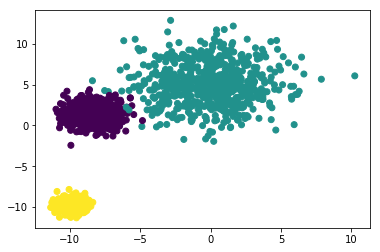

In [19]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y)

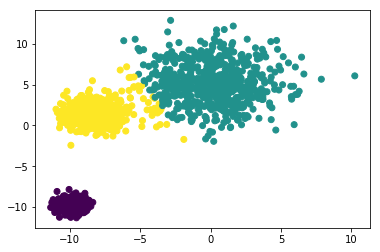

In [20]:
from sklearn.cluster import KMeans

y_predicted = KMeans(n_clusters=3, init="random",max_iter=100, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predicted)

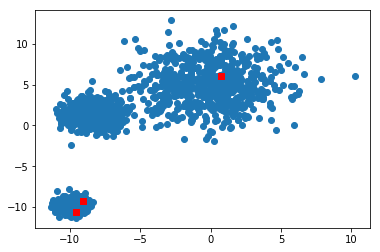

In [21]:
init = X[0:3,:]

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(init[:, 0], init[:, 1], c="r", marker="s")

[[ 0.12939705  5.27391547]
 [-9.88901491 -9.77426564]
 [-8.14832922  1.4822316 ]]


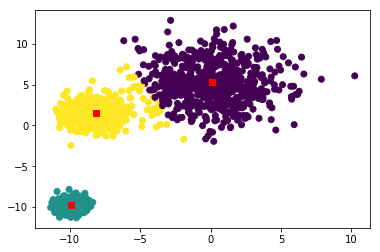

In [26]:
kmeans = KMeans(n_clusters=3, init=init ,max_iter=1, n_init=10)
kmeans.fit(X)
init = kmeans.cluster_centers_
print(init)
y_predicted = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predicted)
plt.scatter(init[:, 0], init[:, 1], c="r", marker="s")

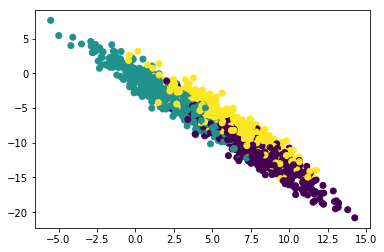

In [55]:
# Lets make it hard for kmeans
import numpy as np
X, y = make_blobs(n_samples=2000, centers = 3, cluster_std=[3, 3, 3])
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)

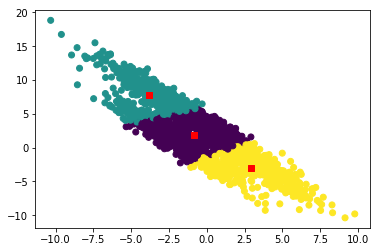

In [39]:
kmeans = KMeans(n_clusters=3 ,max_iter=100, n_init=10)
kmeans.fit(X_aniso)
clust = kmeans.cluster_centers_
y_predicted = kmeans.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_predicted)
plt.scatter(clust[:, 0], clust[:, 1], c="r", marker="s")

## The Expectation maximization algorithm

113781.541824


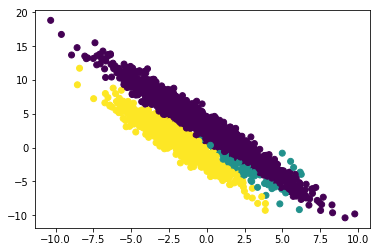

In [40]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=3)
em.fit(X_aniso)
y_predicted = em.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_predicted)
print(em.bic(X))

## PCA

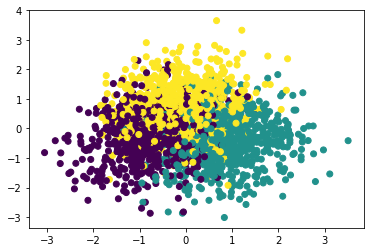

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)

X_pca = pca.fit_transform(X_aniso)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)


In [73]:
pca.explained_variance_

array([ 27.82165236,   0.55546538])

In [74]:
pca.explained_variance_ratio_

array([ 0.98042559,  0.01957441])

In [75]:
pca.components_

array([[-0.57792756,  0.81608807],
       [ 0.81608807,  0.57792756]])

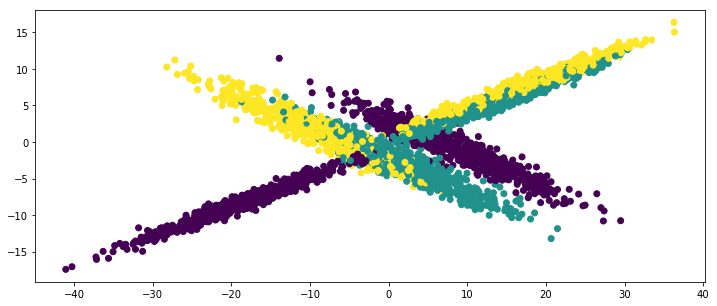

In [163]:
X, y = make_blobs(n_samples=2000, centers = 3, cluster_std=[3, 3, 3])
transformation1 = np.array([[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
transformation2 = np.array([[-0.40887718, -0.65253229], [ -0.60834549, -0.63667341]])
X_aniso1 = np.dot(X, transformation1)
X_aniso1[:,0] *= 3
X_aniso2 = np.dot(X, transformation2)
X_aniso2[:,0] *= 3

X_full = np.concatenate((X_aniso1, X_aniso2), 0)
y_full = np.concatenate((y, y), 0)
plt.figure(figsize=(12, 5))
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full)

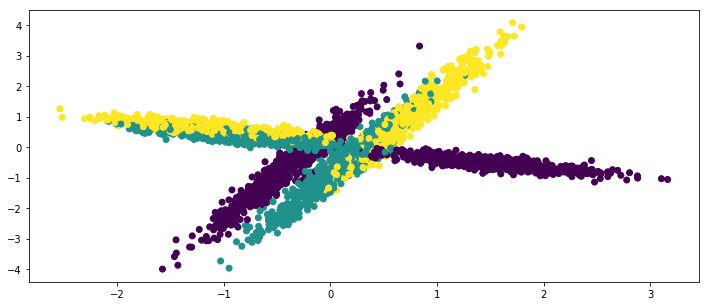

In [164]:
pca = PCA(n_components=2, whiten=True)
from sklearn.decomposition import FastICA

X_pca = pca.fit_transform(X_full)
plt.figure(figsize=(12, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_full)

## ICA

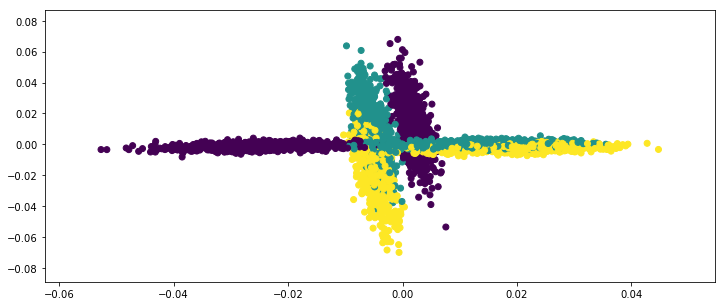

In [173]:
from sklearn.decomposition import FastICA
ica = FastICA(2, max_iter=1000,)

X_ica = ica.fit_transform(X_full)
plt.figure(figsize=(12, 5))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_full)

In [185]:
np.corrcoef(X_ica, rowvar=False)

array([[  1.00000000e+00,  -2.05814098e-15],
       [ -2.05814098e-15,   1.00000000e+00]])